<a href="https://colab.research.google.com/github/Rushikesh3005/Google-Play-Store-analysis/blob/main/Google_Play_Store_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# **There are about 2.8 million applications uploaded on playstore.By google's  survey almost 3739 applications get released on it daily.Some of   them we used to analysis.Play store become the very popular orgnisation related to Android version because of their wide range of application catagories.These applications provide lots of data that can be analyzed and help to Enterpreneurs and a person who launch their application.They can use this analysis to launch application in trending catagory and understand reviews of applications,overcome burgs and provide a usefull and complete application.**







# **The dataset is around 10800 rows and 13 columns which contains numerical values,text,date values and mix type of values.**



---


# **Keys to analysis-**






*   Analyse data to found which catagory is most popular.
*   Which application used mostly.

*   Compare between Free and Paid applications.
*   Analyse related to various generations.
*   studying Percentage of positive sentiments for top 12 apps



---












#**Let's Go**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive



In [3]:
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [5]:
df1=pd.read_csv('/content/mydrive/MyDrive/Almabetter/Copy of Play Store Data.csv')

In [6]:
df1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
df2=pd.read_csv('/content/mydrive/MyDrive/Almabetter/Copy of User Reviews.csv')

In [8]:
df2

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


**Cleaning Data**

In [9]:
#In category 1.9 wrong entry is present let's remove this row 
df1[df1['Category'] == '1.9']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
df1=df1.drop(10472)

In [11]:
#In rating Some Nan values present remove this columns from dataset
df1.dropna(subset = ['Rating'],inplace=True) #dropped rows with nan values in Rating

In [12]:
#number of free and paid app available on play store
df1.groupby(df1['Type']).size()

Type
Free    8719
Paid     647
dtype: int64

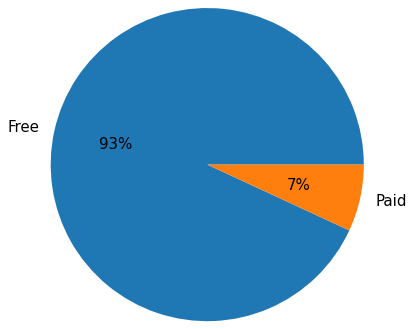

In [13]:
y = [8719, 647]
mylabels = ["Free", "Paid"]
textprops = {"fontsize":15} 
plt.pie(y, labels = mylabels,radius = 1.8,textprops =textprops,autopct='%.0f%%')
plt.show() 

**1.Analyse data to found which catagory is most popular.**

In [14]:
#categorywise app available on play store
cat_df = df1.groupby(by=['Category'])['Category'].count()


Text(0, 0.5, 'Total Count')

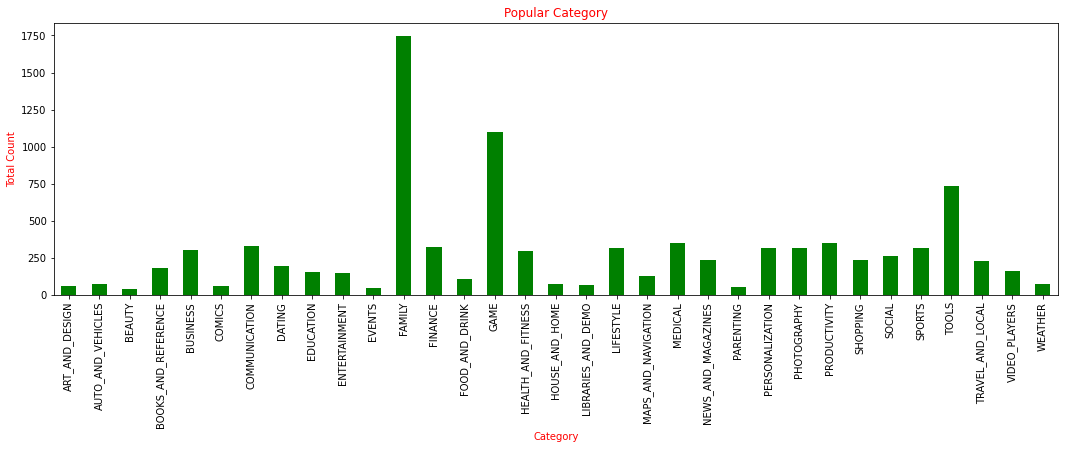

In [15]:
cat_df.plot.bar(color="green",figsize=(18,5))
plt.xticks(rotation="vertical")
plt.title("Popular Category",color="red")
plt.xlabel("Category",color="red")
plt.ylabel("Total Count",color="red")


Text(0, 0.5, 'Average rating')

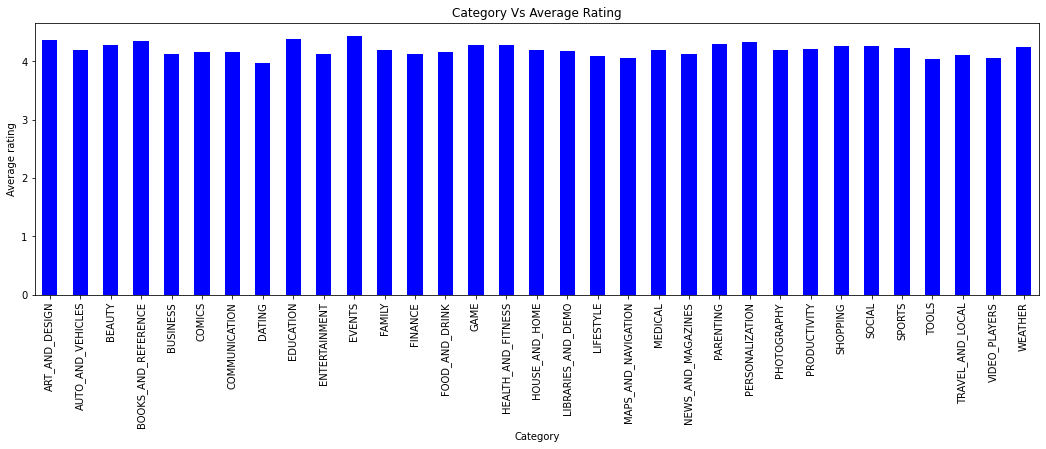

In [16]:
mean_df = df1.groupby(by=['Category'])['Rating'].mean()
mean_df.plot.bar(color="blue",figsize=(18,5))
plt.xticks(rotation="vertical")
plt.title("Category Vs Average Rating")
plt.xlabel("Category")
plt.ylabel("Average rating")


In [17]:
df = pd.DataFrame(df1.groupby(by=['Category','Type'])['Rating'].mean())
df


Rating
Category          Type          
ART_AND_DESIGN    Free  4.338983
                  Paid  4.733333
AUTO_AND_VEHICLES Free  4.184722
                  Paid  4.600000
BEAUTY            Free  4.278571
...                          ...
TRAVEL_AND_LOCAL  Paid  4.100000
VIDEO_PLAYERS     Free  4.062821
                  Paid  4.100000
WEATHER           Free  4.230882
                  Paid  4.371429

[61 rows x 1 columns]

In [18]:
type_list=list(df1['Type'].unique())
print(type_list)

['Free', 'Paid']


In [19]:
cont_df = df1.groupby(by=['Content Rating'])['Content Rating'].count()
cont_df

Content Rating
Adults only 18+       3
Everyone           7420
Everyone 10+        397
Mature 17+          461
Teen               1084
Unrated               1
Name: Content Rating, dtype: int64

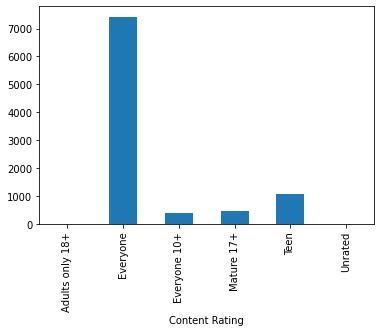

In [20]:
cont_df.plot(x="Content_rating", y="rating_mean", kind="bar")

In [21]:
df1['Installs']= df1['Installs'].str.replace(',','') 
df1['Installs']= df1['Installs'].str.replace('+','') 
df1['Installs']= df1['Installs'].str.replace('Free','') 
df1['Installs']=pd.to_numeric(df1['Installs'], downcast='integer')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [22]:
Install_df = df1.groupby(by=['App'])['Installs'].mean()


In [23]:
Install_df=pd.DataFrame(Install_df)
Install_df.sort_values("Installs", axis = 0, ascending= False,inplace = True, na_position ='last')
Top_25_Installs=Install_df.head(25)


Text(0, 0.5, 'Installs')

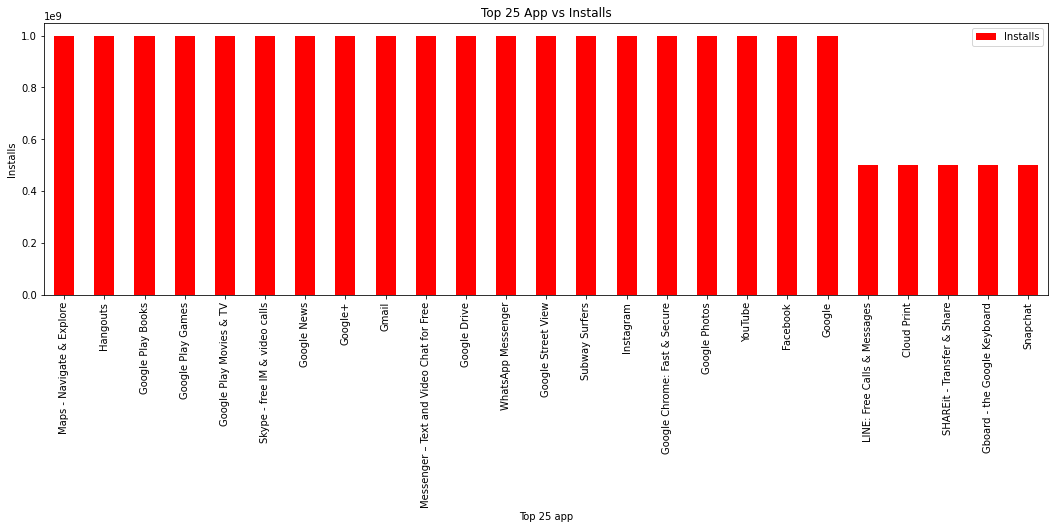

In [24]:
Top_25_Installs.plot.bar(color="red",figsize=(18,5))
plt.xticks(rotation="vertical")
plt.title("Top 25 App vs Installs")
plt.xlabel("Top 25 app")
plt.ylabel("Installs")



In [25]:
df1


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
new_df=df2.copy()
new_df=new_df.drop(['Translated_Review','Sentiment_Polarity','Sentiment_Subjectivity'],axis=1)

In [27]:
new_df=new_df.dropna()
new_df

,App,Sentiment
0,10 Best Foods for You,Positive
1,10 Best Foods for You,Positive
3,10 Best Foods for You,Positive
4,10 Best Foods for You,Positive
5,10 Best Foods for You,Positive
...,...,...
64222,Housing-Real Estate & Property,Positive
64223,Housing-Real Estate & Property,Positive
64226,Housing-Real Estate & Property,Negative
64227,Housing-Real Estate & Property,Positive


In [28]:
df3=pd.DataFrame(new_df.groupby(['App']).size().reset_index(name='count'))
df3=df3[df3['count']>180]
df3

,App,count
0,10 Best Foods for You,194
22,8 Ball Pool,219
114,Angry Birds Classic,273
256,Bowmasters,312
294,"CBS Sports App - Scores, News, Stats & Watch Live",192
327,Calorie Counter - Macros,200
328,Calorie Counter - MyFitnessPal,255
334,Candy Crush Saga,240
510,Duolingo: Learn Languages Free,240
718,Garena Free Fire,222


In [29]:
sent_df=pd.DataFrame(new_df.groupby(['App','Sentiment']).size().reset_index(name='count'))
sent_df



,App,Sentiment,count
0,10 Best Foods for You,Negative,10
1,10 Best Foods for You,Neutral,22
2,10 Best Foods for You,Positive,162
3,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Negative,1
4,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Neutral,8
...,...,...,...
2371,Hotwire Hotel & Car Rental App,Neutral,11
2372,Hotwire Hotel & Car Rental App,Positive,16
2373,Housing-Real Estate & Property,Negative,10
2374,Housing-Real Estate & Property,Neutral,3


In [30]:
pos_sen_df=sent_df[sent_df['Sentiment']=="Positive"]
pos_sen_df

,App,Sentiment,count
2,10 Best Foods for You,Positive,162
5,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Positive,31
8,11st,Positive,23
11,1800 Contacts - Lens Store,Positive,64
14,1LINE – One Line with One Touch,Positive,27
...,...,...,...
2363,Hotels.com: Book Hotel Rooms & Find Vacation D...,Positive,39
2366,Hotspot Shield Free VPN Proxy & Wi-Fi Security,Positive,17
2369,Hotstar,Positive,14
2372,Hotwire Hotel & Car Rental App,Positive,16


In [31]:
df4=df3.merge(pos_sen_df,left_on='App', right_on='App')
df4

,App,count_x,Sentiment,count_y
0,10 Best Foods for You,194,Positive,162
1,8 Ball Pool,219,Positive,104
2,Angry Birds Classic,273,Positive,124
3,Bowmasters,312,Positive,169
4,"CBS Sports App - Scores, News, Stats & Watch Live",192,Positive,123
5,Calorie Counter - Macros,200,Positive,174
6,Calorie Counter - MyFitnessPal,255,Positive,169
7,Candy Crush Saga,240,Positive,102
8,Duolingo: Learn Languages Free,240,Positive,200
9,Garena Free Fire,222,Positive,136


In [32]:
df4['pos_sent_%'] =(df4['count_y']/df4['count_x'])*100
df4

,App,count_x,Sentiment,count_y,pos_sent_%
0,10 Best Foods for You,194,Positive,162,83.505155
1,8 Ball Pool,219,Positive,104,47.488584
2,Angry Birds Classic,273,Positive,124,45.421245
3,Bowmasters,312,Positive,169,54.166667
4,"CBS Sports App - Scores, News, Stats & Watch Live",192,Positive,123,64.062500
5,Calorie Counter - Macros,200,Positive,174,87.000000
6,Calorie Counter - MyFitnessPal,255,Positive,169,66.274510
7,Candy Crush Saga,240,Positive,102,42.500000
8,Duolingo: Learn Languages Free,240,Positive,200,83.333333
9,Garena Free Fire,222,Positive,136,61.261261


[Text(0, 0, '10 Best Foods for You'),
 Text(0, 0, '8 Ball Pool'),
 Text(0, 0, 'Angry Birds Classic'),
 Text(0, 0, 'Bowmasters'),
 Text(0, 0, 'CBS Sports App - Scores, News, Stats & Watch Live'),
 Text(0, 0, 'Calorie Counter - Macros'),
 Text(0, 0, 'Calorie Counter - MyFitnessPal'),
 Text(0, 0, 'Candy Crush Saga'),
 Text(0, 0, 'Duolingo: Learn Languages Free'),
 Text(0, 0, 'Garena Free Fire'),
 Text(0, 0, 'Google Photos'),
 Text(0, 0, 'Helix Jump')]

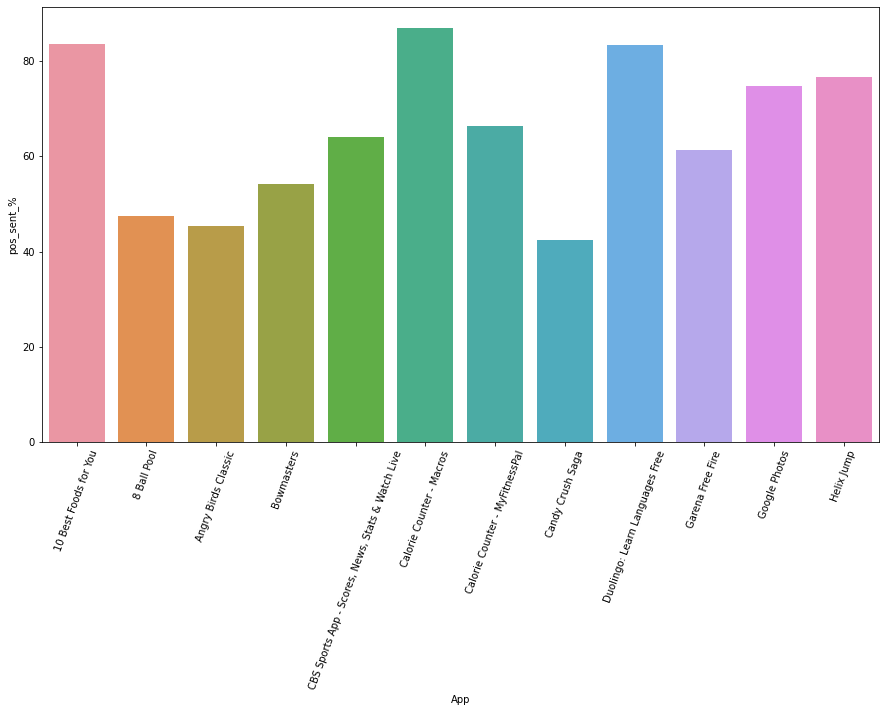

In [33]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'App', y = 'pos_sent_%',data = df4)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 70)

#Corelation between Numeric Features

In [34]:
df1['Reviews']=df1['Reviews'].astype(int)

In [40]:
df1['Price']= df1['Price'].str.replace('$','') 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [42]:
df1["Price"] = pd.to_numeric(df1["Price"], downcast="float")

In [35]:
df1['Size']= df1['Size'].str.replace('M','000000') 
df1['Size']= df1['Size'].str.replace('Varies with device','') 
df1['Size']= df1['Size'].str.replace('k','000000')

In [36]:
df1["Size"] = pd.to_numeric(df1["Size"], downcast="float")

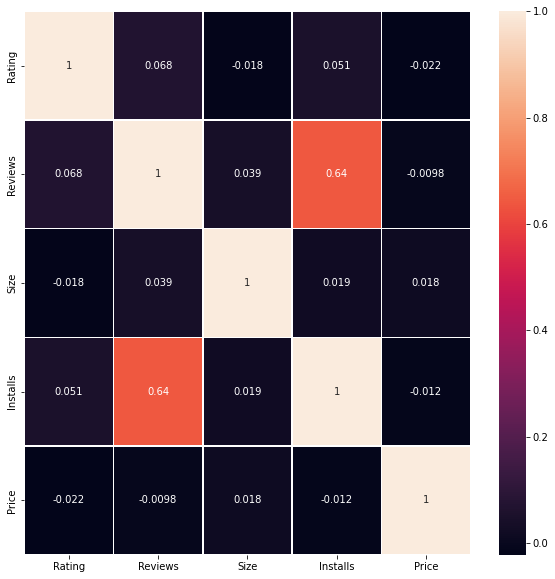

In [43]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)